# Product Recommendation

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine
import networkx as nx
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

# **Data Cleaning**

- Read CSV (comma-separated) file into DataFrame

In [4]:
df = pd.read_csv('Customer_Survey.csv')
print(df.shape)
df.head(5)

(44, 62)


,Transaction,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,1,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,2,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,3,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,4,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,5,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


- Review null values along the column

In [5]:
missing = df.isnull().sum()
print(missing)

Transaction                      0
จักรยานเสือภูเขา                 0
คอลลาเจน                         0
Brownie อวกาศ                    0
แม่โขง                           0
                                ..
หมอนสุขภาพสำหรับคนนอนไม่หลับ     0
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น    0
น้ำส้มดีโด้                      0
Software ถูกลิขสิทธิ์            0
ครีมกันแดด                       0
Length: 62, dtype: int64


In [6]:
df.replace({'เคย': 1, 'ไม่เคย': 0}, inplace=True)
df.drop('Transaction',axis=1, inplace=True)
df.drop('เครื่องย่อยเศษอาหาร_ซ้ำ',axis=1, inplace=True)
df.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1


- Get the value 0,1 counts from data

In [7]:
df.melt()['value'].value_counts(dropna=False)

0    1606
1    1034
Name: value, dtype: int64

In [8]:
df.to_csv('Customer_Survey_New.csv')

In [9]:
df_new = pd.read_csv('Customer_Survey_New.csv')
df.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1


In [10]:
df_new.drop('Unnamed: 0',axis=1, inplace=True)
print(df_new.shape)
df_new.head(5)

(44, 60)


,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,...,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,1


# Explore Data

In [11]:
df_new.describe()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,0.363636,0.522727,0.113636,0.318182,0.204545,0.181818,0.090909,0.386364,0.227273,0.068182,...,0.386364,0.068182,0.113636,0.113636,0.159091,0.386364,0.068182,0.659091,0.772727,1.0
std,0.486607,0.505258,0.321038,0.471155,0.408032,0.390154,0.290803,0.492545,0.423915,0.254972,...,0.492545,0.254972,0.321038,0.321038,0.369989,0.492545,0.254972,0.479495,0.423915,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


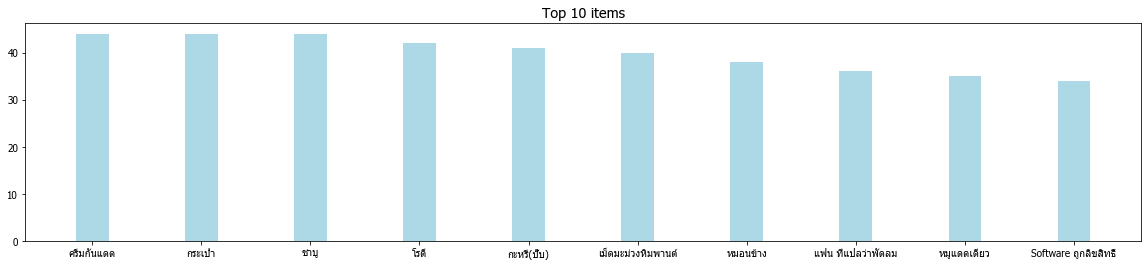

In [12]:
top_10_item = df_new.sum(axis=0).sort_values(ascending=False)[:10]
Item_nametop = top_10_item.keys().tolist()
Item_10Top = np.arange(len(top_10_item))

plt.figure(figsize=(20,4))
plt.bar(Item_10Top, top_10_item.iloc[:], color = "lightblue",width=0.3)
plt.rcParams.update({'font.size': 12})
plt.xticks(Item_10Top, Item_nametop)
plt.title('Top 10 items')
plt.show()

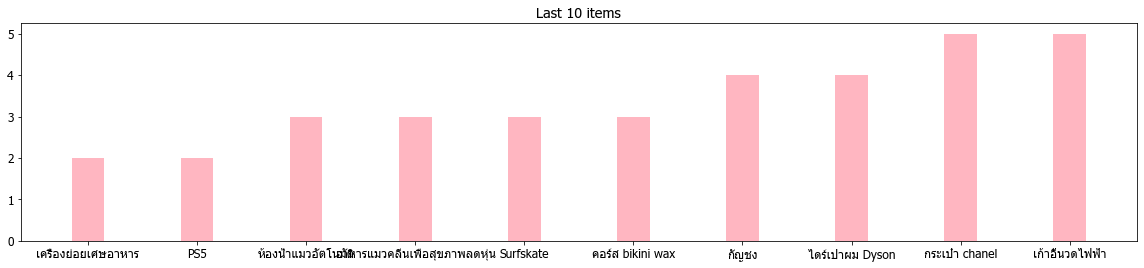

In [13]:
last_10_item = df_new.sum(axis=0).sort_values(ascending=True)[:10]
Item_namelast = last_10_item.keys().tolist()
Item_10last = np.arange(len(last_10_item))

plt.figure(figsize=(20,4))
plt.bar(Item_10last, last_10_item.iloc[:], color = "lightpink",width=0.3)
#plt.rcParams.update({'font.size': 12})
plt.xticks(Item_10last, Item_namelast)
plt.title('Last 10 items')
plt.show()

# **Collaborative Filtering**


- Prepare Data

In [14]:
item_item_matrix = pd.DataFrame(index=df_new.columns,columns=df_new.columns)
item_item_matrix.head(5)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
จักรยานเสือภูเขา,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
คอลลาเจน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brownie อวกาศ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
แม่โขง,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Botox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Calculate cosine similarity - Consine between Item to Item Profile

In [15]:
for i in range(0,len(item_item_matrix.columns)):
    for j in range(0,len(item_item_matrix.columns)):
        item_item_matrix.iloc[i,j] = 1 - cosine(df_new.iloc[:,i],df_new.iloc[:,j])

item_item_matrix.head(5)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
จักรยานเสือภูเขา,1.0,0.573415,0.33541,0.400892,0.416667,0.265165,0.25,0.485071,0.474342,0.144338,...,0.485071,0.433013,0.33541,0.33541,0.094491,0.485071,0.433013,0.464238,0.600245,0.603023
คอลลาเจน,0.573415,1.0,0.279751,0.334367,0.556038,0.147442,0.208514,0.404577,0.32969,0.361158,...,0.556294,0.361158,0.373002,0.186501,0.236433,0.606866,0.361158,0.658243,0.679439,0.722999
Brownie อวกาศ,0.33541,0.279751,1.0,0.478091,0.447214,0.632456,0.67082,0.108465,0.141421,0.258199,...,0.21693,0.516398,0.8,0.6,0.169031,0.325396,0.516398,0.249136,0.383482,0.3371
แม่โขง,0.400892,0.334367,0.478091,1.0,0.267261,0.566947,0.400892,0.388922,0.253546,0.154303,...,0.388922,0.46291,0.358569,0.239046,0.202031,0.453743,0.308607,0.397033,0.412514,0.564076
Botox,0.416667,0.556038,0.447214,0.267261,1.0,0.235702,0.333333,0.242536,0.316228,0.19245,...,0.242536,0.19245,0.596285,0.447214,0.125988,0.404226,0.19245,0.309492,0.514496,0.452267


- Convert results into list of rules

In [16]:
links = item_item_matrix.rename_axis('related item', axis='columns').stack().reset_index()
links

,level_0,related item,0
0,จักรยานเสือภูเขา,จักรยานเสือภูเขา,1.0
1,จักรยานเสือภูเขา,คอลลาเจน,0.573415
2,จักรยานเสือภูเขา,Brownie อวกาศ,0.33541
3,จักรยานเสือภูเขา,แม่โขง,0.400892
4,จักรยานเสือภูเขา,Botox,0.416667
...,...,...,...
3595,ครีมกันแดด,หมอนสุขภาพสำหรับคนนอนไม่หลับ,0.621582
3596,ครีมกันแดด,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,0.261116
3597,ครีมกันแดด,น้ำส้มดีโด้,0.811844
3598,ครีมกันแดด,Software ถูกลิขสิทธิ์,0.879049


In [17]:
links.columns = ['item', 'related item','value']

- Filter rules


In [18]:
links_filtered=links.loc[ (links['value'] > 0.9) & (links['item'] != links['related item']) ]

In [19]:
links_filtered_graph = links_filtered.sort_values(by=['value'],ascending=False)
links_filtered_graph.head(40)

,item,related item,value
3572,ครีมกันแดด,ชาบู,1.0
3571,ครีมกันแดด,กระเป๋า,1.0
1979,ชาบู,ครีมกันแดด,1.0
1951,ชาบู,กระเป๋า,1.0
1919,กระเป๋า,ครีมกันแดด,1.0
1892,กระเป๋า,ชาบู,1.0
3585,ครีมกันแดด,โรตี,0.977008
2759,โรตี,ครีมกันแดด,0.977008
2732,โรตี,ชาบู,0.977008
2731,โรตี,กระเป๋า,0.977008


# **Graph Visualization**

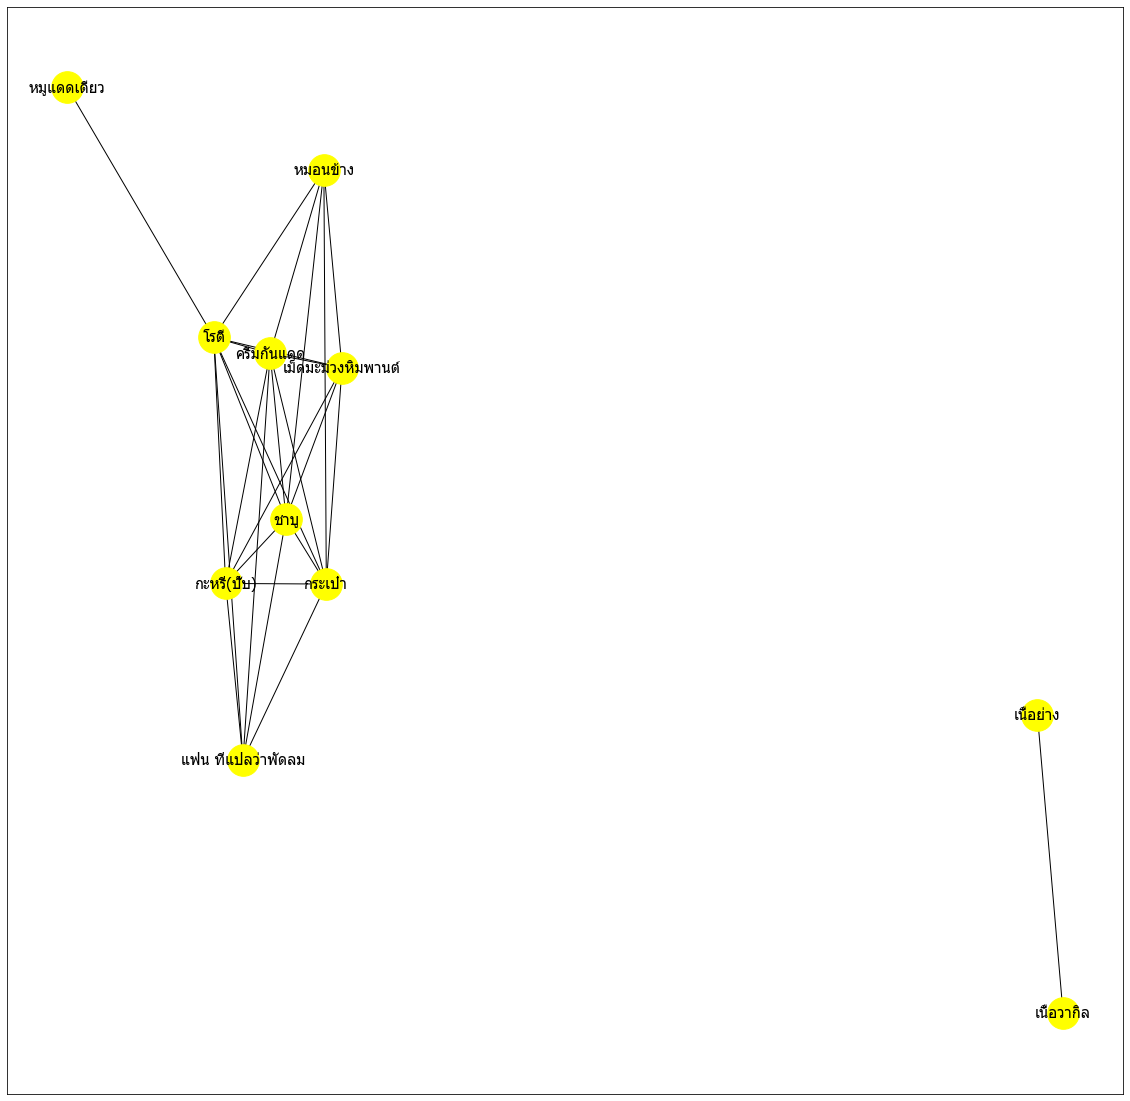

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, ax=plt.subplots(figsize=(20,20))

GA=nx.from_pandas_edgelist(links_filtered_graph,'item','related item')
nx.draw_networkx(GA, node_size=1000, node_color='yellow', with_labels=True,
                 font_size=15, font_color='black', font_family='Tahoma')
plt.savefig("plot network.png", dpi=1000)
plt.show()